## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.499439 -0.020031  0.435290 -1.077031  1.047495 -0.000071
1 -1.518917  1.008036 -0.663590 -1.537680  0.081328 -2.010161
2  1.410306  0.329320 -0.073662  0.162236 -1.080594  0.314957
3 -1.014434  0.248788 -1.464596  1.070118 -1.331306  0.312348
4  0.804033  0.271755 -0.947555  0.427302 -0.579889  0.956766


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9822426	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9737438	total: 70ms	remaining: 34.9s
2:	learn: 0.9654135	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9545227	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9461388	total: 71.6ms	remaining: 14.3s
5:	learn: 0.9374004	total: 72.2ms	remaining: 12s
6:	learn: 0.9274419	total: 72.7ms	remaining: 10.3s
7:	learn: 0.9185265	total: 73.3ms	remaining: 9.09s
8:	learn: 0.9116146	total: 73.9ms	remaining: 8.13s
9:	learn: 0.9031219	total: 74.3ms	remaining: 7.36s
10:	learn: 0.8947904	total: 75ms	remaining: 6.74s
11:	learn: 0.8859638	total: 75.5ms	remaining: 6.21s
12:	learn: 0.8767647	total: 76ms	remaining: 5.77s
13:	learn: 0.8693605	total: 76.5ms	remaining: 5.39s
14:	learn: 0.8638391	total: 77ms	remaining: 5.06s
15:	learn: 0.8558149	total: 77.5ms	remaining: 4.76s
16:	learn: 0.8469499	total: 78.1ms	remaining: 4.51s
17:	learn: 0.8395001	total: 78.5ms	remaining: 4.28s
18:	learn: 0.8313952	total: 79ms	remaining: 4.08s
19:	

82:	learn: 0.4873287	total: 109ms	remaining: 1.21s
83:	learn: 0.4832353	total: 110ms	remaining: 1.2s
84:	learn: 0.4796597	total: 110ms	remaining: 1.19s
85:	learn: 0.4763687	total: 111ms	remaining: 1.18s
86:	learn: 0.4727502	total: 111ms	remaining: 1.17s
87:	learn: 0.4691922	total: 112ms	remaining: 1.16s
88:	learn: 0.4657539	total: 112ms	remaining: 1.15s
89:	learn: 0.4620327	total: 113ms	remaining: 1.14s
90:	learn: 0.4581329	total: 113ms	remaining: 1.13s
91:	learn: 0.4541818	total: 114ms	remaining: 1.12s
92:	learn: 0.4500750	total: 114ms	remaining: 1.11s
93:	learn: 0.4465110	total: 114ms	remaining: 1.1s
94:	learn: 0.4429536	total: 115ms	remaining: 1.09s
95:	learn: 0.4398490	total: 116ms	remaining: 1.09s
96:	learn: 0.4365751	total: 116ms	remaining: 1.08s
97:	learn: 0.4331090	total: 117ms	remaining: 1.07s
98:	learn: 0.4298754	total: 117ms	remaining: 1.07s
99:	learn: 0.4264851	total: 118ms	remaining: 1.06s
100:	learn: 0.4237323	total: 118ms	remaining: 1.05s
101:	learn: 0.4196895	total: 119

247:	learn: 0.1560377	total: 188ms	remaining: 570ms
248:	learn: 0.1551829	total: 188ms	remaining: 568ms
249:	learn: 0.1544147	total: 189ms	remaining: 566ms
250:	learn: 0.1533877	total: 189ms	remaining: 565ms
251:	learn: 0.1523821	total: 190ms	remaining: 563ms
252:	learn: 0.1513171	total: 190ms	remaining: 562ms
253:	learn: 0.1506584	total: 191ms	remaining: 560ms
254:	learn: 0.1493884	total: 191ms	remaining: 558ms
255:	learn: 0.1485817	total: 192ms	remaining: 557ms
256:	learn: 0.1476981	total: 192ms	remaining: 555ms
257:	learn: 0.1469068	total: 193ms	remaining: 554ms
258:	learn: 0.1457467	total: 193ms	remaining: 552ms
259:	learn: 0.1448468	total: 193ms	remaining: 551ms
260:	learn: 0.1439253	total: 194ms	remaining: 549ms
261:	learn: 0.1430683	total: 194ms	remaining: 547ms
262:	learn: 0.1418561	total: 195ms	remaining: 546ms
263:	learn: 0.1410565	total: 195ms	remaining: 544ms
264:	learn: 0.1399938	total: 196ms	remaining: 543ms
265:	learn: 0.1391613	total: 196ms	remaining: 541ms
266:	learn: 

464:	learn: 0.0504724	total: 294ms	remaining: 338ms
465:	learn: 0.0503561	total: 294ms	remaining: 337ms
466:	learn: 0.0502421	total: 295ms	remaining: 336ms
467:	learn: 0.0501303	total: 295ms	remaining: 336ms
468:	learn: 0.0500094	total: 296ms	remaining: 335ms
469:	learn: 0.0499007	total: 296ms	remaining: 334ms
470:	learn: 0.0497940	total: 297ms	remaining: 333ms
471:	learn: 0.0493837	total: 297ms	remaining: 332ms
472:	learn: 0.0492995	total: 297ms	remaining: 331ms
473:	learn: 0.0492228	total: 298ms	remaining: 330ms
474:	learn: 0.0488208	total: 298ms	remaining: 330ms
475:	learn: 0.0487525	total: 299ms	remaining: 329ms
476:	learn: 0.0483589	total: 299ms	remaining: 328ms
477:	learn: 0.0482921	total: 300ms	remaining: 327ms
478:	learn: 0.0482261	total: 300ms	remaining: 326ms
479:	learn: 0.0478232	total: 300ms	remaining: 326ms
480:	learn: 0.0477586	total: 301ms	remaining: 325ms
481:	learn: 0.0473640	total: 301ms	remaining: 324ms
482:	learn: 0.0470024	total: 302ms	remaining: 323ms
483:	learn: 

622:	learn: 0.0252160	total: 372ms	remaining: 225ms
623:	learn: 0.0250941	total: 373ms	remaining: 225ms
624:	learn: 0.0249600	total: 373ms	remaining: 224ms
625:	learn: 0.0247983	total: 374ms	remaining: 223ms
626:	learn: 0.0247736	total: 374ms	remaining: 223ms
627:	learn: 0.0246345	total: 375ms	remaining: 222ms
628:	learn: 0.0245825	total: 375ms	remaining: 221ms
629:	learn: 0.0244497	total: 376ms	remaining: 221ms
630:	learn: 0.0244257	total: 377ms	remaining: 220ms
631:	learn: 0.0243299	total: 377ms	remaining: 220ms
632:	learn: 0.0242065	total: 378ms	remaining: 219ms
633:	learn: 0.0241126	total: 379ms	remaining: 219ms
634:	learn: 0.0240620	total: 379ms	remaining: 218ms
635:	learn: 0.0239749	total: 380ms	remaining: 217ms
636:	learn: 0.0238825	total: 380ms	remaining: 217ms
637:	learn: 0.0237460	total: 381ms	remaining: 216ms
638:	learn: 0.0235907	total: 381ms	remaining: 215ms
639:	learn: 0.0235419	total: 382ms	remaining: 215ms
640:	learn: 0.0234939	total: 382ms	remaining: 214ms
641:	learn: 

839:	learn: 0.0116397	total: 478ms	remaining: 91.1ms
840:	learn: 0.0116186	total: 479ms	remaining: 90.5ms
841:	learn: 0.0115788	total: 479ms	remaining: 90ms
842:	learn: 0.0115549	total: 480ms	remaining: 89.4ms
843:	learn: 0.0115105	total: 480ms	remaining: 88.8ms
844:	learn: 0.0114617	total: 481ms	remaining: 88.2ms
845:	learn: 0.0114410	total: 482ms	remaining: 87.7ms
846:	learn: 0.0114213	total: 483ms	remaining: 87.2ms
847:	learn: 0.0113681	total: 483ms	remaining: 86.6ms
848:	learn: 0.0113160	total: 483ms	remaining: 86ms
849:	learn: 0.0112975	total: 484ms	remaining: 85.4ms
850:	learn: 0.0112267	total: 484ms	remaining: 84.8ms
851:	learn: 0.0111846	total: 485ms	remaining: 84.2ms
852:	learn: 0.0111667	total: 485ms	remaining: 83.6ms
853:	learn: 0.0111166	total: 486ms	remaining: 83ms
854:	learn: 0.0110990	total: 486ms	remaining: 82.4ms
855:	learn: 0.0110832	total: 486ms	remaining: 81.8ms
856:	learn: 0.0110678	total: 487ms	remaining: 81.2ms
857:	learn: 0.0110185	total: 487ms	remaining: 80.7ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

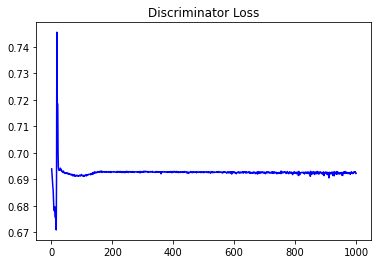

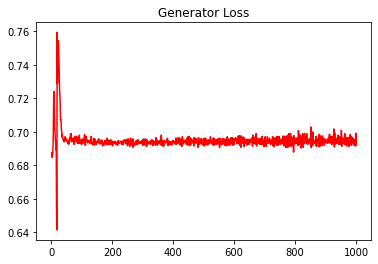

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10251736971809781


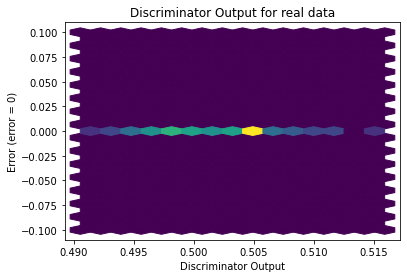

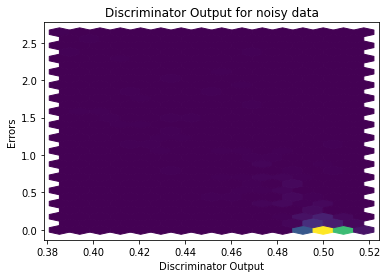

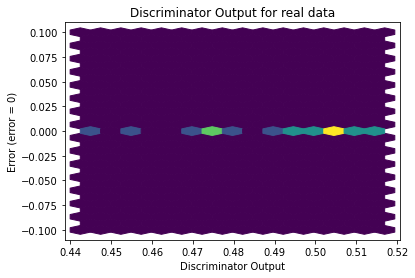

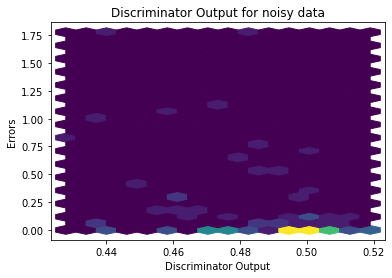

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


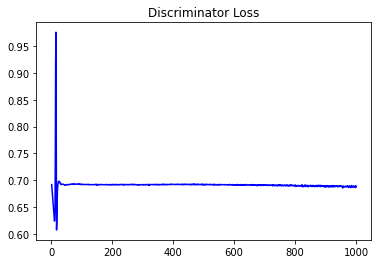

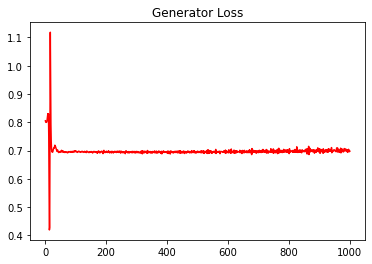

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16605355730243604


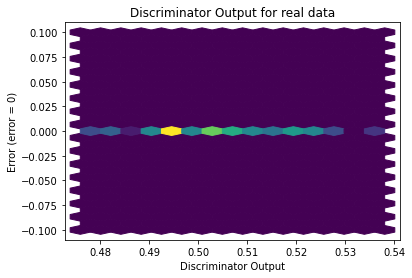

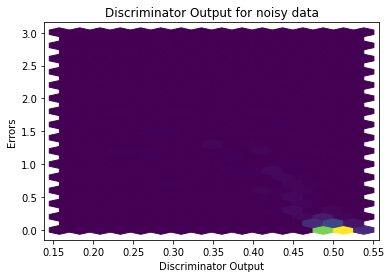

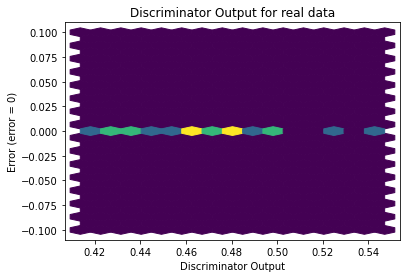

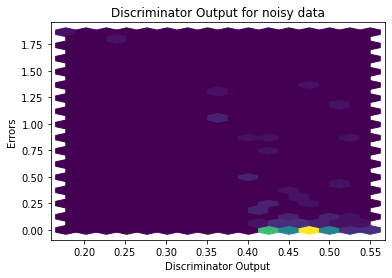

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0740]], requires_grad=True)
